In [ ]:
import numpy as np
from pandas import DataFrame
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
in_confirmed_cases = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'India']
in_confirmed_cases


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22
148,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,42894345,42905844,42916117,42924130,42931045,42938599,42945160,42951556,42957477,42962953


In [ ]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
in_deaths_reported = deaths_reported.loc[confirmed_cases['Country/Region'] == 'India']
in_deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22
148,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,513226,513481,513724,513843,514023,514246,514388,514589,514878,515036


In [ ]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
in_recovered_cases = recovered_cases.loc[recovered_cases['Country/Region'] == 'India']
in_recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22
133,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-08-2021.csv')
in_latest_data = latest_data.loc[latest_data['Country_Region'] == 'India']
in_latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
249,NaN,NaN,Andaman and Nicobar Islands,India,2021-04-09 04:21:13,11.225999,92.968178,5149,62,5027.0,60.0,"Andaman and Nicobar Islands, India",1234.665592,1.204117
250,NaN,NaN,Andhra Pradesh,India,2021-04-09 04:21:13,15.912900,79.740000,915832,7268,893651.0,14913.0,"Andhra Pradesh, India",1699.024772,0.793595
251,NaN,NaN,Arunachal Pradesh,India,2021-04-09 04:21:13,27.768456,96.384277,16873,56,16788.0,29.0,"Arunachal Pradesh, India",1074.399952,0.331891
252,NaN,NaN,Assam,India,2021-04-09 04:21:13,26.357149,92.830441,219272,1112,215790.0,2370.0,"Assam, India",615.810823,0.507133
253,NaN,NaN,Bihar,India,2021-04-09 04:21:13,25.679658,85.604840,273830,1595,264730.0,7505.0,"Bihar, India",219.415194,0.582478


In [ ]:
in_data = in_latest_data.drop(index= [282])

In [ ]:
in_data2 = in_data.drop(columns= ['FIPS', 'Admin2','Country_Region','Lat', 'Long_','Combined_Key',])

In [ ]:
in_data2.style.background_gradient(cmap='Reds')

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
249,Andaman and Nicobar Islands,2021-04-09 04:21:13,5149,62,5027.000000,60.000000,1234.665592,1.204117
250,Andhra Pradesh,2021-04-09 04:21:13,915832,7268,893651.000000,14913.000000,1699.024772,0.793595
251,Arunachal Pradesh,2021-04-09 04:21:13,16873,56,16788.000000,29.000000,1074.399952,0.331891
252,Assam,2021-04-09 04:21:13,219272,1112,215790.000000,2370.000000,615.810823,0.507133
253,Bihar,2021-04-09 04:21:13,273830,1595,264730.000000,7505.000000,219.415194,0.582478
254,Chandigarh,2021-04-09 04:21:13,29521,389,26017.000000,3115.000000,2548.268281,1.317706
255,Chhattisgarh,2021-04-09 04:21:13,407231,4563,334543.000000,68125.000000,1383.434584,1.120494
256,Dadra and Nagar Haveli and Daman and Diu,2021-04-09 04:21:13,3842,2,3631.000000,209.000000,623.980875,0.052056
257,Delhi,2021-04-09 04:21:13,698005,11157,663667.000000,23181.000000,3730.468226,1.598413
258,Goa,2021-04-09 04:21:13,60811,842,56638.000000,3331.000000,3833.632782,1.384618


In [ ]:
map = folium.Map(location=[20, 60], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(in_data['Lat'], in_data['Long_'], in_data['Confirmed'], in_data['Province_State']):
    folium.CircleMarker([lat, lon], radius=value*(1/40000), popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<strong>Confirmed</strong>: ' + str(value) + ' '),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [ ]:
c_df23 = in_confirmed_cases.drop(columns= ['Province/State','Country/Region','Lat','Long'])
d_df23 = in_deaths_reported.drop(columns= ['Province/State','Country/Region','Lat','Long'])
r_df23 = in_recovered_cases.drop(columns= ['Province/State','Country/Region','Lat','Long'])

In [ ]:
dfconfirmed_cases = c_df23.transpose()
dfdeaths_reported = d_df23.transpose()
dfrecovered_cases = r_df23.transpose()

In [ ]:
dfconfirmed_cases.index.name = 'Date_YMD'
dfconfirmed_cases.reset_index(inplace=True)
dfdeaths_reported.index.name = 'Date_YMD'
dfdeaths_reported.reset_index(inplace=True)
dfrecovered_cases.index.name = 'Date_YMD'
dfrecovered_cases.reset_index(inplace=True)

In [ ]:
c_df11 = dfconfirmed_cases.rename(columns={ 146 : "TotalConfirmed"})
d_df11 = dfdeaths_reported.rename(columns={ 146 : "TotalDeath"})
r_df11 = dfrecovered_cases.rename(columns={ 131 : "TotalRecovered"})

In [ ]:
df_confirmed = c_df11
df_deaths = d_df11
df_recovered = r_df11

In [ ]:
pip install pycountry

  Using cached pycountry-22.3.5.tar.gz (10.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=55abb7d50dc3be439bc193957fcc81d5c51d4409fe558f1927d6bfd0edad8624
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 8.4 MB/s 
     |████████████████████████████████| 6.3 MB 41.4 MB/s 
     |████████████████████████████████| 16.7 MB 453 kB/s 


In [ ]:
import pycountry
import plotly.express as px
import pandas as pd
# Starting the required libraries
import numpy as np
import geopandas as gpd
import pandas as pd
from functools import reduce

In [ ]:
id_list = in_confirmed_cases.columns.to_list()[:4]
vars_list = in_confirmed_cases.columns.to_list()[4:]
confirmed_tidy = pd.melt(in_confirmed_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Confirmed')
deaths_tidy = pd.melt(in_deaths_reported, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Deaths')
recovered_tidy = pd.melt(in_recovered_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='recovered')
# 1.3 Merging the three dataframes into one
data_frames = [confirmed_tidy, deaths_tidy, recovered_tidy]          
df_corona = reduce(lambda left, right: pd.merge(left, right, on = id_list+['Date'], how='outer'), data_frames)

id_vars = df_corona.columns[:5]
data_type = ['Confirmed', 'Deaths', 'recovered']
df_corona = pd.melt(df_corona, id_vars=id_vars,value_vars=data_type, var_name='type', value_name='Count')
df_corona['Date'] = pd.to_datetime(df_corona['Date'],format='%m/%d/%y', errors='raise')

In [ ]:
corona_sums = df_corona.groupby(['type', 'Date'],as_index=False).agg({'Count':'sum'})

In [ ]:
pip install plotly_express

In [ ]:
import plotly_express as px
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='Count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums)
fig.show()

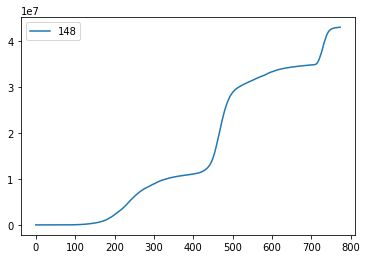

In [ ]:
df_confirmed.plot()

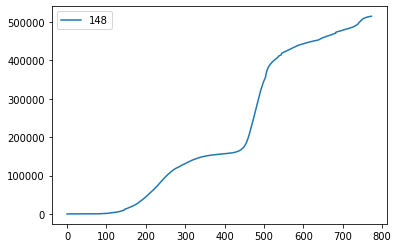

In [ ]:
df_deaths.plot()

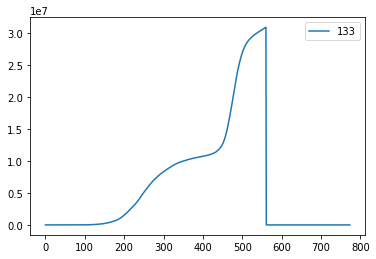

In [ ]:
df_recovered.plot()

In [ ]:
df_c = df_confirmed
df_c.columns = ['ds', 'y']

In [ ]:
df_d = df_deaths
df_d.columns = ['ds', 'y']

In [ ]:
df_r = df_recovered
df_r.columns = ['ds', 'y']

In [ ]:
df_c['ds'] = pd.to_datetime(df_c['ds'])

In [ ]:
df_d['ds'] = pd.to_datetime(df_d['ds'])

In [ ]:
df_r['ds'] = pd.to_datetime(df_r['ds'])

In [ ]:
from fbprophet import Prophet

In [ ]:
# Initialize the Model
c_model = Prophet(daily_seasonality=True)
c_model.fit(df_c)
d_model = Prophet(daily_seasonality=True)
d_model.fit(df_d)
r_model = Prophet(daily_seasonality=True)
r_model.fit(df_r)

In [ ]:
# Create future dates of 30 days
future_dates = c_model.make_future_dataframe(periods = 100)
future_dates.tail()

,ds
869,2022-06-09
870,2022-06-10
871,2022-06-11
872,2022-06-12
873,2022-06-13


In [ ]:
c_prediction = c_model.predict(future_dates)
d_prediction = d_model.predict(future_dates)
r_prediction = r_model.predict(future_dates)

In [ ]:
corona_sums

,type,Date,Count
0,Confirmed,2020-01-22,0
1,Confirmed,2020-01-23,0
2,Confirmed,2020-01-24,0
3,Confirmed,2020-01-25,0
4,Confirmed,2020-01-26,0
...,...,...,...
2317,recovered,2022-03-01,0
2318,recovered,2022-03-02,0
2319,recovered,2022-03-03,0
2320,recovered,2022-03-04,0


In [ ]:
id_list = in_confirmed_cases.columns.to_list()[:4]
vars_list = in_confirmed_cases.columns.to_list()[4:]
confirmed_tidy = pd.melt(in_confirmed_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Confirmed')
deaths_tidy = pd.melt(in_deaths_reported, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Deaths')
recovered_tidy = pd.melt(in_recovered_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='recovered')
# 1.3 Merging the three dataframes into one
data_frames = [confirmed_tidy, deaths_tidy, recovered_tidy]          
df_corona = reduce(lambda left, right: pd.merge(left, right, on = id_list+['Date'], how='outer'), data_frames)

id_vars = df_corona.columns[:5]
data_type = ['Confirmed', 'Deaths', 'recovered']
df_corona = pd.melt(df_corona, id_vars=id_vars,value_vars=data_type, var_name='type', value_name='Count')
df_corona['Date'] = pd.to_datetime(df_corona['Date'],format='%m/%d/%y', errors='raise')

In [ ]:
aq = np.round(c_prediction)
aq1 = np.round(d_prediction)
aq2 = np.round(r_prediction)

In [ ]:
v1 = aq[aq.columns[0:2]]
v1['type'] = 'Confirmed'
v2 = aq1[aq.columns[0:2]]
v2['type'] = 'Deaths'
v3 = aq2[aq.columns[0:2]]
v3['type'] = 'recovered'
data_frames = [v1,v2,v3]
df = pd.concat([v1, v2, v3], axis=0)
df.reset_index(drop=True, inplace=True)
df

,ds,trend,type
0,2020-01-22,182711.0,Confirmed
1,2020-01-23,124462.0,Confirmed
2,2020-01-24,66212.0,Confirmed
3,2020-01-25,7963.0,Confirmed
4,2020-01-26,-50287.0,Confirmed
...,...,...,...
2617,2022-06-09,-4455511.0,recovered
2618,2022-06-10,-4475903.0,recovered
2619,2022-06-11,-4496295.0,recovered
2620,2022-06-12,-4516686.0,recovered


In [ ]:
corona_sums1 = df.groupby(['type', 'ds'],as_index=False).agg({'trend':'sum'})
def plot_timeseries1(df):
    fig = px.line(df, x='ds', y='trend', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)
    
fig = plot_timeseries1(corona_sums1)
fig.show()

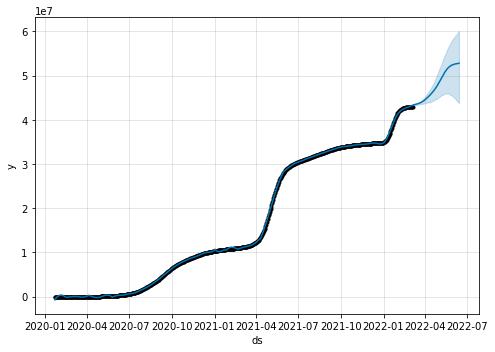

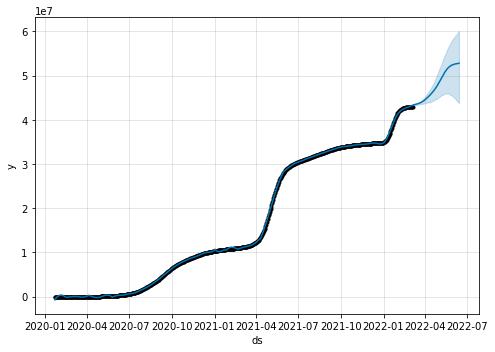

In [ ]:
c_model.plot(c_prediction,figsize=(7,5))

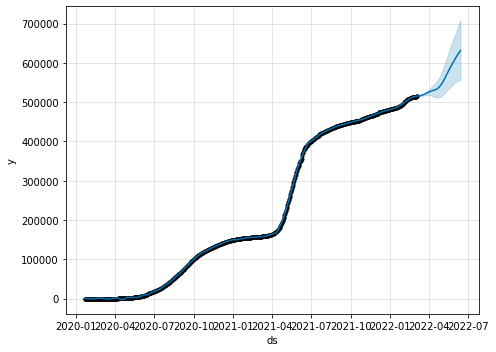

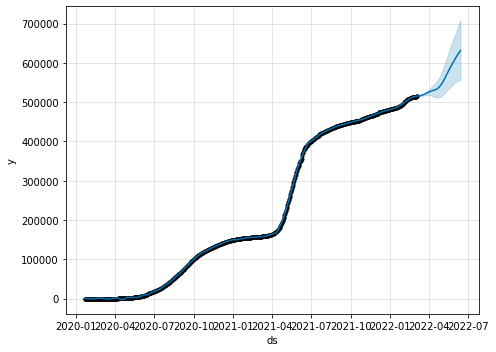

In [ ]:
d_model.plot(d_prediction,figsize=(7,5))

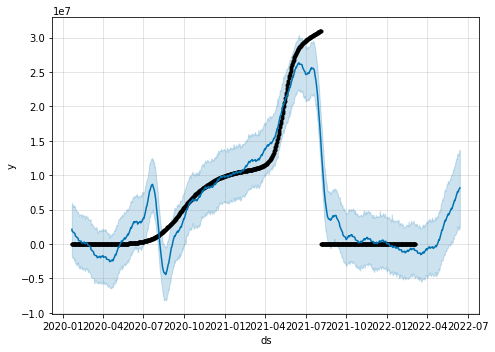

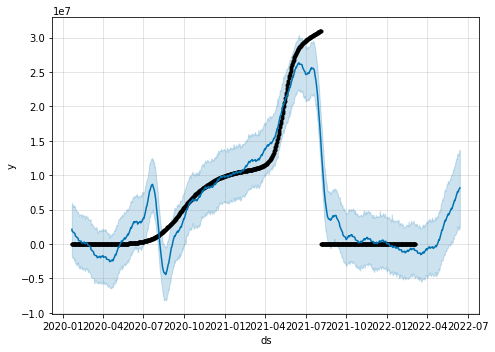

In [ ]:
r_model.plot(r_prediction,figsize=(7,5))

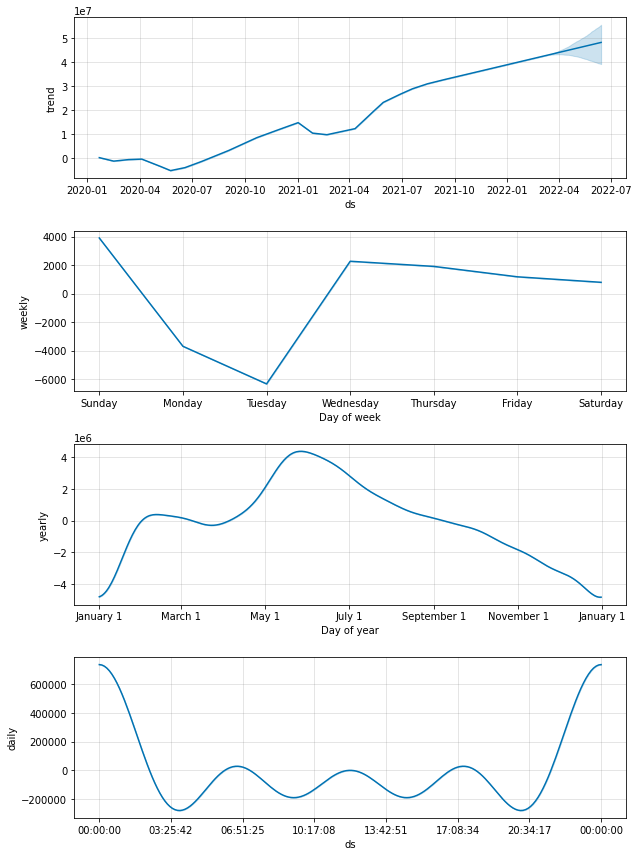

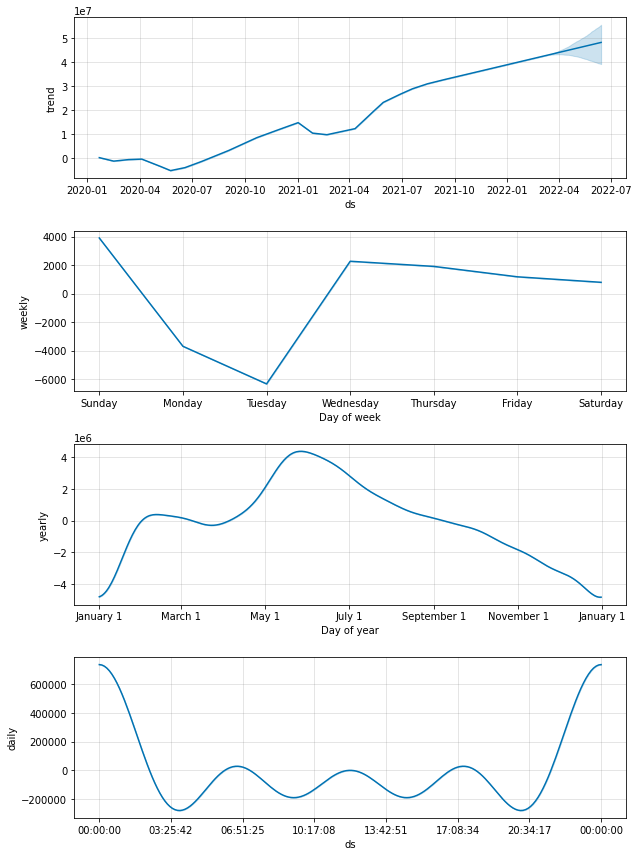

In [ ]:
# Visualize each components [Trends, Weekly]
c_model.plot_components(c_prediction)

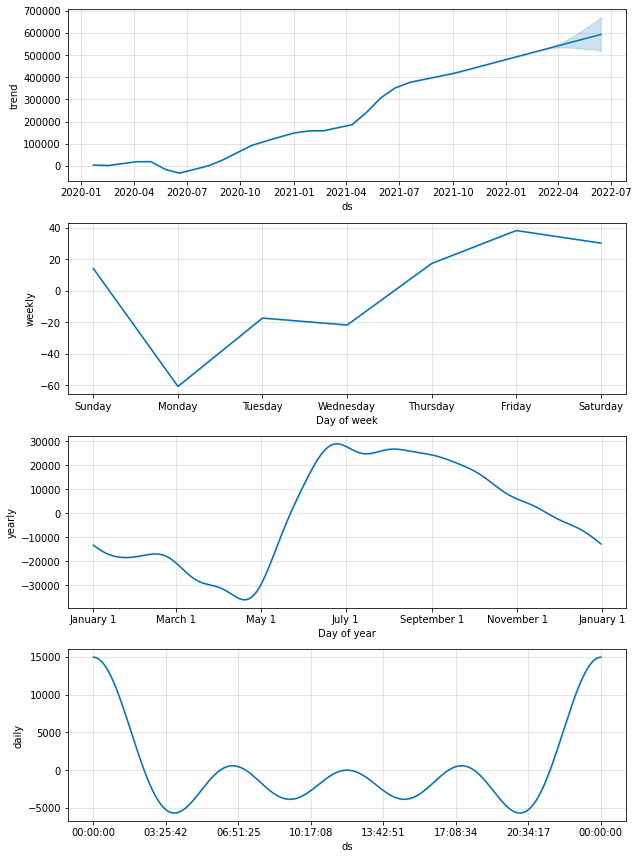

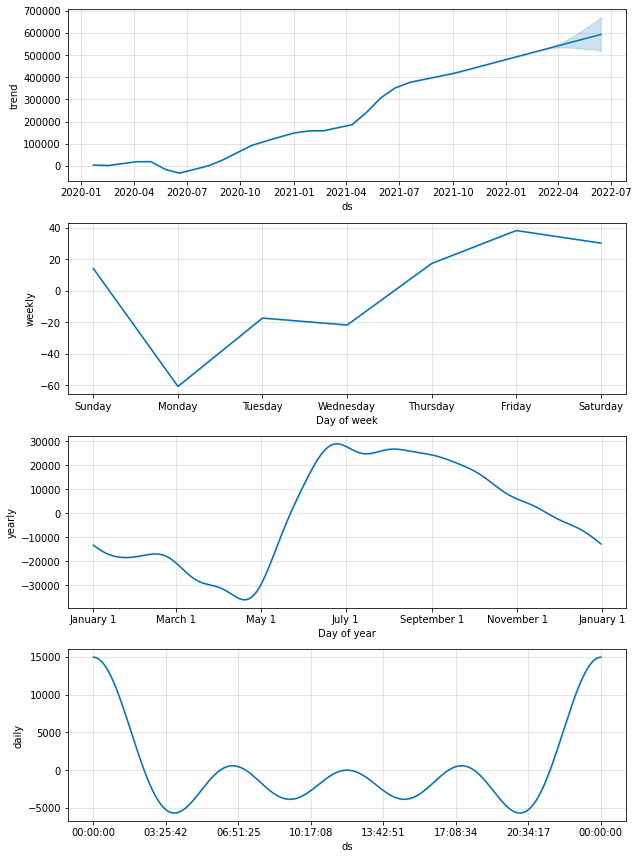

In [ ]:
# Visualize each components [Trends, Weekly]
d_model.plot_components(d_prediction)

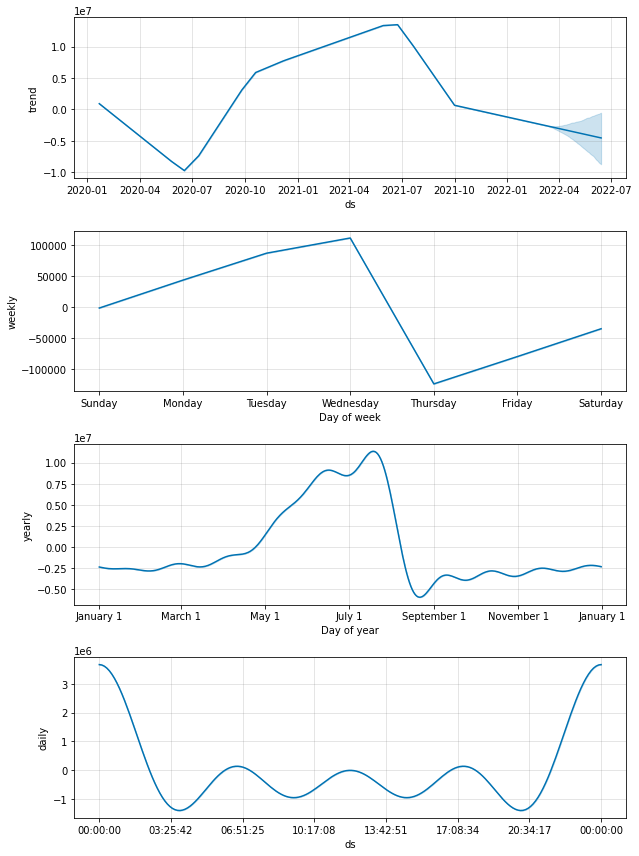

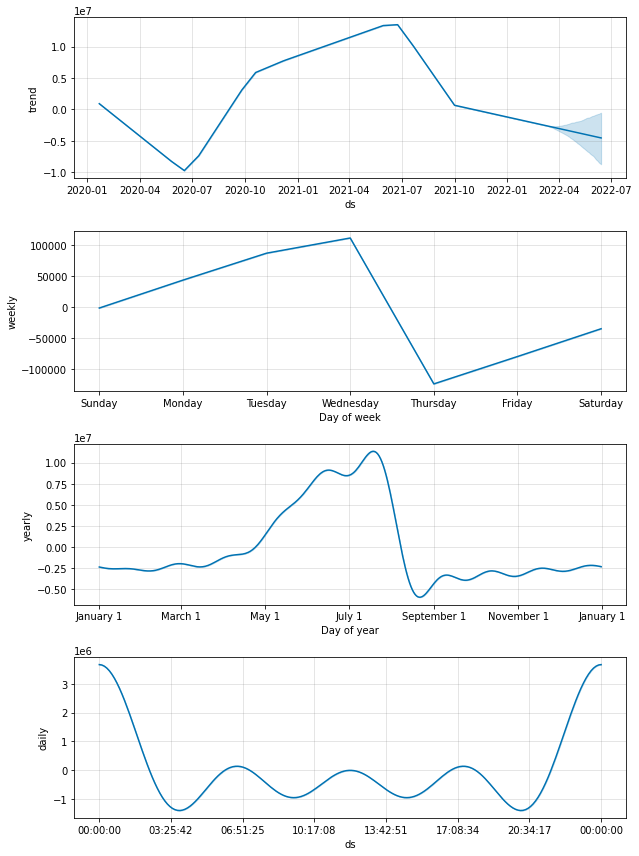

In [ ]:
# Visualize each components [Trends, Weekly]
r_model.plot_components(r_prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv_c = cross_validation(c_model, period='1 days', horizon = '100 days')
df_cv_d = cross_validation(d_model, period='1 days', horizon = '100 days')
df_cv_r = cross_validation(r_model, period='1 days', horizon = '100 days')  

INFO:fbprophet:Making 308 forecasts with cutoffs between 2021-01-22 00:00:00 and 2021-11-25 00:00:00


  0%|          | 0/308 [00:00<?, ?it/s]

SystemError: ignored

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p_c = performance_metrics(df_cv_c)
df_p_d = performance_metrics(df_cv_d)
df_p_r = performance_metrics(df_cv_r)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
print(df_p_c.head())
print(df_p_r.head())
print(df_p_d.head())

  horizon           mse           rmse            mae      mape     mdape  \
0 10 days  7.826346e+10  279756.079181  168239.152708  0.007692  0.003523   
1 11 days  1.049636e+11  323980.892011  196144.609691  0.008965  0.004161   
2 12 days  1.383636e+11  371972.516872  226483.398598  0.010341  0.004814   
3 13 days  1.795512e+11  423734.826237  259274.770297  0.011817  0.005516   
4 14 days  2.296657e+11  479234.462577  294540.713570  0.013393  0.006249   

   coverage  
0  0.267208  
1  0.239610  
2  0.220455  
3  0.208442  
4  0.201299  
  horizon           mse          rmse           mae     mdape  coverage
0 10 days  7.391540e+13  8.597407e+06  4.224381e+06  0.017330  0.201623
1 11 days  8.039583e+13  8.966372e+06  4.470206e+06  0.021066  0.171429
2 12 days  8.697185e+13  9.325870e+06  4.716938e+06  0.025218  0.151299
3 13 days  9.360105e+13  9.674763e+06  4.963576e+06  0.030272  0.136039
4 14 days  1.002457e+14  1.001228e+07  5.208864e+06  0.035334  0.126623
  horizon           m

In [ ]:
print("Confirmed Cases")
print(df_p_c.mean())
print("Recovered Cases")
print(df_p_r.mean())
print("Deaths")
print(df_p_d.mean())

Confirmed Cases
horizon          55 days 00:00:00
mse         30979133723868.320312
rmse               4728015.626974
mae                  3702863.1511
mape                     0.130745
mdape                    0.085023
coverage                 0.327601
dtype: object
Recovered Cases
horizon        55 days 00:00:00
mse         382819744703280.125
rmse            18751299.495265
mae              14308585.14284
mdape                       inf
coverage               0.095676
dtype: object
Deaths
horizon      55 days 00:00:00
mse         4080086544.016433
rmse             54235.055666
mae              41890.780772
mape                 0.113443
mdape                 0.07916
coverage             0.317868
dtype: object


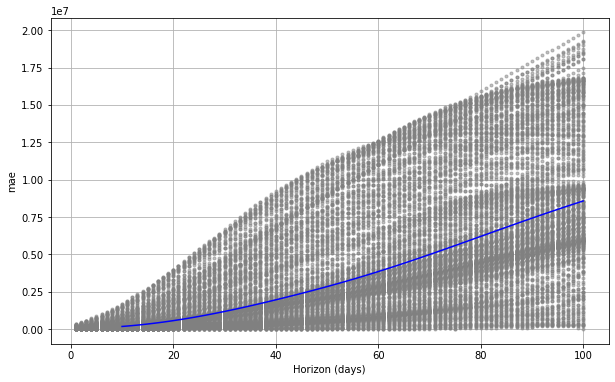

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_c, metric='mae')

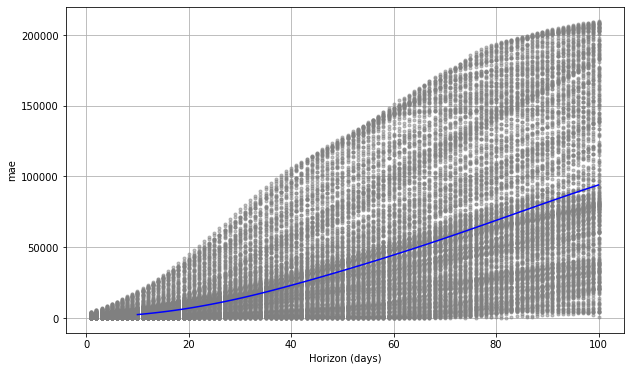

In [ ]:
fig = plot_cross_validation_metric(df_cv_d, metric='mae')

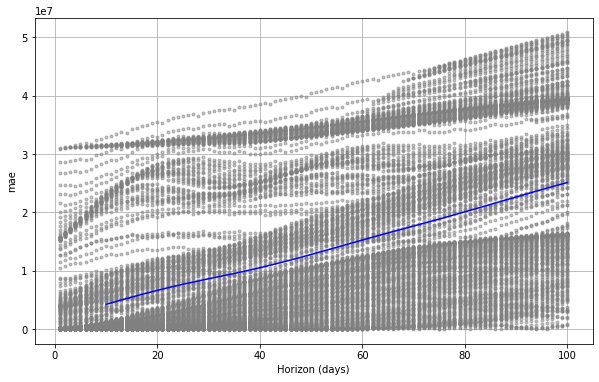

In [ ]:
fig = plot_cross_validation_metric(df_cv_r, metric='mae')